In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_name = "Raw_data_1Hr_2024_site_5725_Mansarovar_Sector-12_Jaipur_RSPCB_1Hr.csv"

df = pd.read_csv(file_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            8784 non-null   object 
 1   PM2.5 (µg/m³)        8283 non-null   float64
 2   PM10 (µg/m³)         8274 non-null   float64
 3   NO (µg/m³)           8420 non-null   float64
 4   NO2 (µg/m³)          8399 non-null   float64
 5   NOx (ppb)            8424 non-null   float64
 6   NH3 (µg/m³)          8329 non-null   float64
 7   SO2 (µg/m³)          8355 non-null   float64
 8   CO (mg/m³)           8445 non-null   float64
 9   Ozone (µg/m³)        8393 non-null   float64
 10  Benzene (µg/m³)      8150 non-null   float64
 11  Toluene (µg/m³)      8211 non-null   float64
 12  Xylene (µg/m³)       0 non-null      float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  6953 non-null   float64
 15  MP-Xylene (µg/m³)    7044 non-null   f

In [ ]:
print("Initial data shape: ", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Initial data shape:  (8784, 25)

Missing values:
 Timestamp                 0
PM2.5 (µg/m³)           501
PM10 (µg/m³)            510
NO (µg/m³)              364
NO2 (µg/m³)             385
NOx (ppb)               360
NH3 (µg/m³)             455
SO2 (µg/m³)             429
CO (mg/m³)              339
Ozone (µg/m³)           391
Benzene (µg/m³)         634
Toluene (µg/m³)         573
Xylene (µg/m³)         8784
O Xylene (µg/m³)       8784
Eth-Benzene (µg/m³)    1831
MP-Xylene (µg/m³)      1740
AT (°C)                 478
RH (%)                  542
WS (m/s)                396
WD (deg)                400
RF (mm)                 280
TOT-RF (mm)               0
SR (W/mt2)              269
BP (mmHg)              8784
VWS (m/s)              8784
dtype: int64


<Axes: >

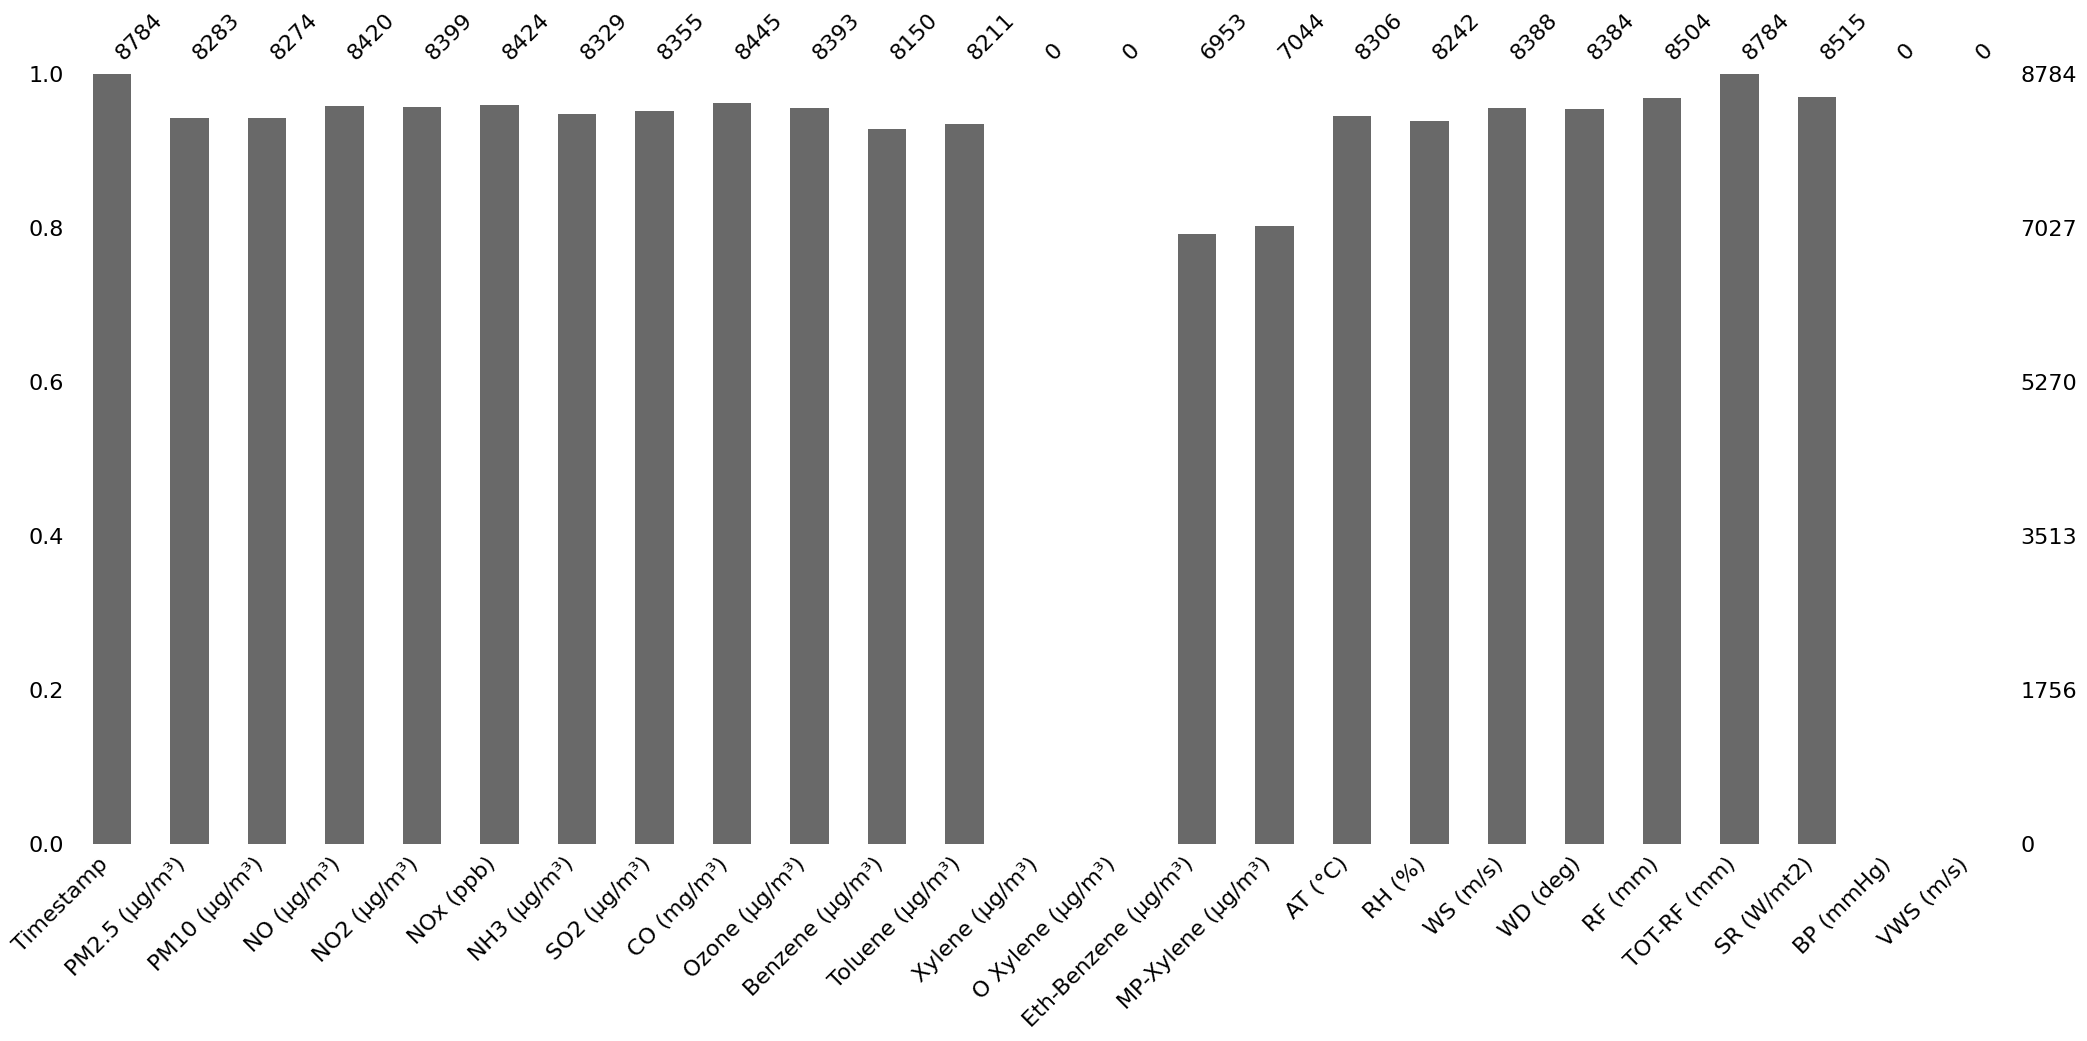

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
columns_to_keep =  ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
                  'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)','AT (°C)',
                  'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']

# Select columns
df1 = df[columns_to_keep].copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      8784 non-null   object 
 1   PM2.5 (µg/m³)  8283 non-null   float64
 2   PM10 (µg/m³)   8274 non-null   float64
 3   NO2 (µg/m³)    8399 non-null   float64
 4   NH3 (µg/m³)    8329 non-null   float64
 5   SO2 (µg/m³)    8355 non-null   float64
 6   CO (mg/m³)     8445 non-null   float64
 7   Ozone (µg/m³)  8393 non-null   float64
 8   AT (°C)        8306 non-null   float64
 9   RH (%)         8242 non-null   float64
 10  WS (m/s)       8388 non-null   float64
 11  WD (deg)       8384 non-null   float64
 12  SR (W/mt2)     8515 non-null   float64
 13  BP (mmHg)      0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 960.9+ KB


In [ ]:
from datetime import datetime

def convert_to_datetime(series):
    """
    Convert a pandas Series containing timestamps with automatic format detection.
    Tries multiple common datetime formats until one succeeds.
    """
    # Common timestamp formats to try (add more as needed)
    formats = [
        '%d-%m-%Y %H:%M',    # 01-01-2023 13:30
        '%m/%d/%Y %H:%M',    # 01/01/2023 13:30
        '%Y-%m-%d %H:%M:%S', # 2023-01-01 13:30:00
        '%d-%b-%Y %H:%M',    # 01-Jan-2023 13:30
        '%b %d, %Y %H:%M',   # Jan 01, 2023 13:30
        '%Y%m%d %H:%M',      # 20230101 13:30
        '%d.%m.%Y %H:%M',    # 01.01.2023 13:30
        '%H:%M %d-%m-%Y',    # 13:30 01-01-2023
        '%Y/%m/%d %H:%M:%S', # 2023/01/01 13:30:00
        '%d %B %Y %H:%M',    # 01 January 2023 13:30
        '%m-%d-%Y %I:%M %p', # 01-01-2023 01:30 PM
        '%Y-%m-%dT%H:%M:%S', # ISO format
    ]

    for fmt in formats:
        try:
            return pd.to_datetime(series, format=fmt, errors='raise')
        except ValueError:
            continue

    # If none of the formats worked, try without format (let pandas infer)
    try:
        return pd.to_datetime(series, errors='raise')
    except ValueError as e:
        print(f"Failed to parse timestamps: {e}")
        return series  # return original if all attempts fail

# Usage example:
df1['Timestamp'] = convert_to_datetime(df1['Timestamp'])
df1['Month'] = df1['Timestamp'].dt.month

In [ ]:
def get_season(month):
  if month in [1, 2, 11, 12]:
    return 'Winter'
  elif month in [3, 4, 5, 6]:
    return 'Summer'
  else:
    return 'Monsoon'


df1['Season'] = df1['Month'].apply(get_season)

In [ ]:
from statsmodels.tsa.seasonal import STL
from scipy import stats

# 1. First define the outlier detection function
def detect_seasonal_outliers(df, column, window=24*7, sigma=3, method='stl'):
    """
    Robust outlier detection for time series data with multiple methods.

    Parameters:
    - df: DataFrame with datetime index
    - column: Column name to analyze
    - window: Rolling window size (default 1 week for hourly data)
    - sigma: Threshold for outlier detection
    - method: 'stl' (default), 'iqr', or 'zscore'

    Returns:
    - Boolean Series (True=outlier)
    """
    if not pd.api.types.is_datetime64_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    series = df[column].dropna()

    if method == 'stl':
        try:
            # STL decomposition for seasonality
            stl = STL(series, period=24, seasonal=13, robust=True)
            res = stl.fit()

            # Use Median Absolute Deviation (MAD) for residuals
            residuals = res.resid
            median = np.median(residuals)
            mad = stats.median_abs_deviation(residuals, nan_policy='omit')
            norm_resid = (residuals - median) / mad

            outliers = np.abs(norm_resid) > sigma
            return outliers.reindex(df.index, fill_value=False)

        except Exception as e:
            print(f"STL failed for {column}: {e}. Falling back to IQR.")
            method = 'iqr'

    if method == 'iqr':
        # Rolling IQR method for non-normal data
        q1 = series.rolling(window, min_periods=1).quantile(0.25)
        q3 = series.rolling(window, min_periods=1).quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (sigma/1.35) * iqr  # Adjusted to match 3-sigma for normal dist
        upper = q3 + (sigma/1.35) * iqr
        outliers = (series < lower) | (series > upper)
        return outliers.reindex(df.index, fill_value=False)

    else:  # zscore
        # Simple rolling z-score
        mean = series.rolling(window, min_periods=1).mean()
        std = series.rolling(window, min_periods=1).std()
        outliers = np.abs(series - mean) > sigma * std
        return outliers.reindex(df.index, fill_value=False)

# 2. Now run your outlier detection and reporting
numeric_columns = df1.select_dtypes(include=['float64']).columns

print("Outlier Report:")
outlier_counts = pd.DataFrame(columns=['Column', 'Total Values', 'Outliers Removed', 'Percentage'])

for col in numeric_columns:
    # Store original stats
    original_mean = df1[col].mean()
    original_std = df1[col].std()

    # Detect outliers
    is_outlier = detect_seasonal_outliers(df1, col, window=24*7, sigma=3, method='stl')
    num_outliers = is_outlier.sum()
    pct_outliers = (num_outliers / len(df1)) * 100

    # Store results
    outlier_counts.loc[len(outlier_counts)] = [
        col,
        len(df1),
        num_outliers,
        round(pct_outliers, 2)
    ]

    # Remove outliers
    df1.loc[is_outlier, col] = np.nan

    # Print diagnostics
    print(f"{col}:")
    print(f"  Removed {num_outliers} outliers ({pct_outliers:.2f}%)")
    print(f"  Mean: {original_mean:.2f} → {df1[col].mean():.2f}")
    print(f"  Std: {original_std:.2f} → {df1[col].std():.2f}\n")

print("\nSummary Report:")
print(outlier_counts)

Outlier Report:
PM2.5 (µg/m³):
  Removed 1588 outliers (18.08%)
  Mean: 56.74 → 44.53
  Std: 55.39 → 35.41

PM10 (µg/m³):
  Removed 1466 outliers (16.69%)
  Mean: 142.53 → 118.22
  Std: 100.04 → 68.99

NO2 (µg/m³):
  Removed 1798 outliers (20.47%)
  Mean: 33.24 → 25.34
  Std: 27.97 → 19.50

NH3 (µg/m³):
  Removed 1572 outliers (17.90%)
  Mean: 23.31 → 19.56
  Std: 20.01 → 11.38

SO2 (µg/m³):
  Removed 1648 outliers (18.76%)
  Mean: 6.33 → 4.76
  Std: 8.98 → 3.33

CO (mg/m³):
  Removed 1915 outliers (21.80%)
  Mean: 0.90 → 0.69
  Std: 0.87 → 0.48

Ozone (µg/m³):
  Removed 1643 outliers (18.70%)
  Mean: 54.09 → 49.32
  Std: 42.19 → 38.17

AT (°C):
  Removed 1309 outliers (14.90%)
  Mean: 27.28 → 27.15
  Std: 7.44 → 7.44

RH (%):
  Removed 1229 outliers (13.99%)
  Mean: 52.52 → 51.80
  Std: 24.27 → 24.69

WS (m/s):
  Removed 1217 outliers (13.85%)
  Mean: 0.68 → 0.60
  Std: 0.43 → 0.35

WD (deg):
  Removed 1444 outliers (16.44%)
  Mean: 187.16 → 186.83
  Std: 78.87 → 63.24

SR (W/mt2):
  

In [ ]:
#Calculate and display seasonal statistics

seasonal_stats = df1.groupby('Season')[numeric_columns].agg(['mean', 'std', 'count', 'min', 'max']).round(2)
print("Seasonal Statistics:")
print(seasonal_stats)

Seasonal Statistics:
        PM2.5 (µg/m³)                           PM10 (µg/m³)               \
                 mean    std count  min     max         mean    std count   
Season                                                                      
Monsoon         31.74  23.19  2352  2.0  356.00         72.7  47.16  2450   
Summer          29.09  12.23  2471  1.0   76.75        119.8  50.66  2239   
Winter          80.97  41.99  1872  8.5  343.00        169.2  70.81  2119   

                       ... SR (W/mt2)                            BP (mmHg)  \
          min     max  ...       mean    std count   min     max      mean   
Season                 ...                                                   
Monsoon   3.0  391.50  ...      39.27  40.21  1781  17.0  214.25       NaN   
Summer    8.5  343.50  ...      50.57  71.66  1724   4.0  319.00       NaN   
Winter   26.0  455.25  ...      34.43  43.19  2129   0.0  272.25       NaN   

                           
        std count m

In [ ]:
#Calculate missing value percentages
missing_percentages = (df1.isnull().sum() / len(df1)*100).round(2)
print("\nMissing Value Percentages:")
print(missing_percentages)


Missing Value Percentages:
Timestamp          0.00
PM2.5 (µg/m³)     23.78
PM10 (µg/m³)      22.50
NO2 (µg/m³)       24.85
NH3 (µg/m³)       23.08
SO2 (µg/m³)       23.65
CO (mg/m³)        25.66
Ozone (µg/m³)     23.16
AT (°C)           20.34
RH (%)            20.16
WS (m/s)          18.36
WD (deg)          20.99
SR (W/mt2)        35.86
BP (mmHg)        100.00
Month              0.00
Season             0.00
dtype: float64


In [ ]:
for col in numeric_columns:
  df1[col] = df1.groupby('Season')[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Check missing values after cleaning
missing_values = df1.isnull().sum()
missing_percentage = (df1.isnull().sum() / len(df) * 100).round(2)

# Display missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print("\nMissing Values After Cleaning:")
print(missing_data[missing_data['Missing Values'] > 0])  # Display only columns with missing values



Missing Values After Cleaning:
           Missing Values  Percentage (%)
BP (mmHg)            8784           100.0


In [ ]:
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df1.to_csv('cleaned_data.csv', index=False)

# Download the file
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>